Vanila K-mean Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances


Function for implementation and ploting Vanilla K-mean Clustering

In [ ]:
def plot_k_means(X, K, max_iter=20, beta=3.0, show_plots=False):
    N, D = X.shape
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    initial_centers = np.random.choice(N, K, replace=False)
    M = X[initial_centers]

    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / exponents.sum(axis=1, keepdims=True)


        # step 2: recalculate means
        # decent vectorization
        # for k in range(K):
        #     M[k] = R[:,k].dot(X) / R[:,k].sum()
        # oldM = M

        # full vectorization
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        # print("diff M:", np.abs(M - oldM).sum())

        c = cost(X, R, M)
        costs.append(c)
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break

        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                pass
                # print("cost increased!")
                # print("M:", M)
                # print("R.min:", R.min(), "R.max:", R.max())

    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    print("Final cost", costs[-1])
    return M, R

Code for generating the data

In [ ]:
def get_simple_data():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3
    return X

Main function to run code

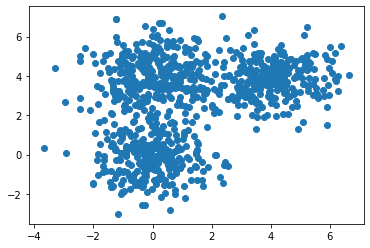

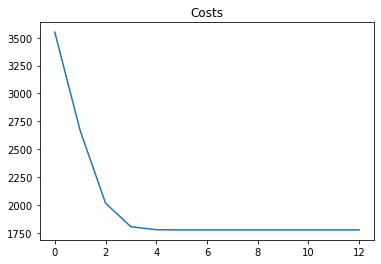

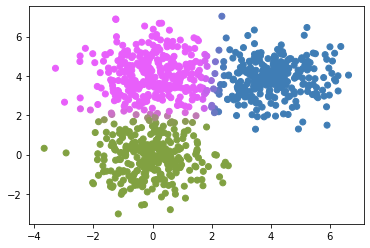

Final cost 1775.982247853873


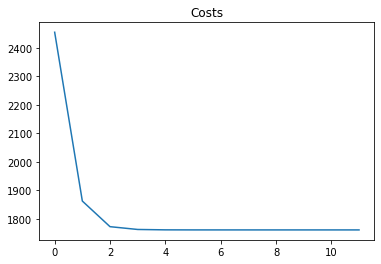

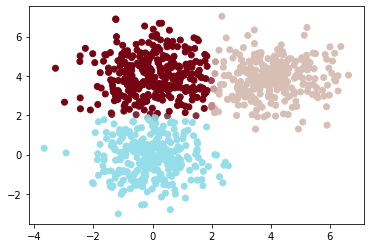

Final cost 1761.2317831519294


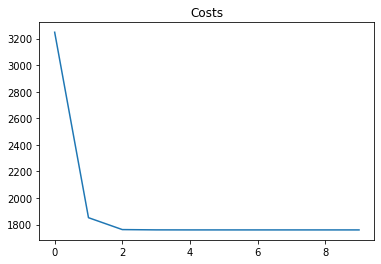

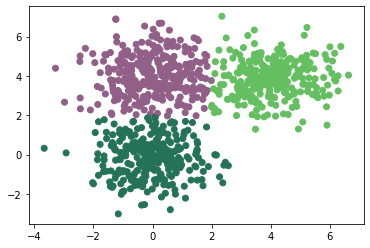

Final cost 1759.8078738710599


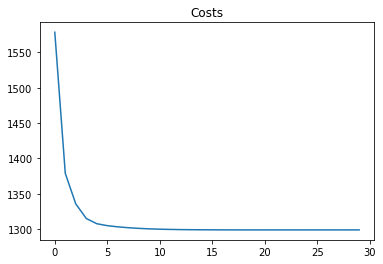

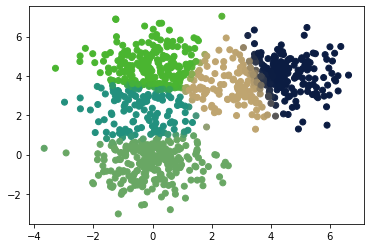

Final cost 1298.865721958498


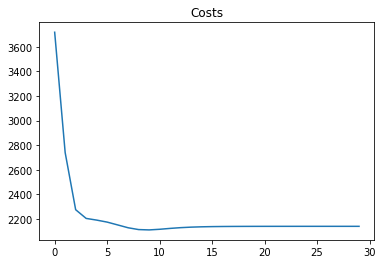

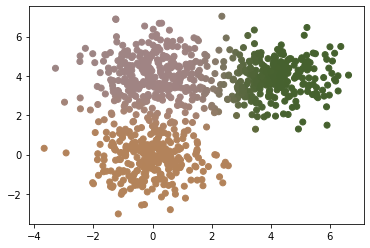

Final cost 2140.2227445285853


In [ ]:
def main():
    X = get_simple_data()

    # what does it look like without clustering?
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3 # luckily, we already know this
    plot_k_means(X, K, beta=1.0, show_plots=True)

    K = 3 # luckily, we already know this
    plot_k_means(X, K, beta=3.0, show_plots=True)

    K = 3 # luckily, we already know this
    plot_k_means(X, K, beta=10.0, show_plots=True)

    K = 5 # what happens if we choose a "bad" K?
    plot_k_means(X, K, max_iter=30, show_plots=True)

    K = 5 # what happens if we change beta?
    plot_k_means(X, K, max_iter=30, beta=0.3, show_plots=True)


if __name__ == '__main__':
    main()

In [ ]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)


def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost

Soft K-Mean Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Distance between 2 points can be calculated using dot product of their difference with itself

In [ ]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

Cost function for Soft-K mean Clustering.

In [ ]:
def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n,k]*d(M[k], X[n])
    return cost

Ploting and implementing the results for visualization

In [ ]:
def plot_k_means(X, K, max_iter=20, beta=1.0):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.ones((N, K)) / K

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    grid_width = 5
    grid_height = max_iter / grid_width
    random_colors = np.random.random((K, 3))
    plt.figure()

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        # moved the plot inside the for loop
        colors = R.dot(random_colors)
        plt.subplot(grid_width, grid_height, i+1)
        plt.scatter(X[:,0], X[:,1], c=colors)

        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break
    plt.show()


main function to initialize the program

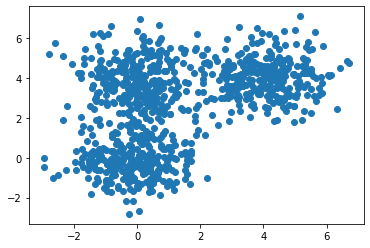

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


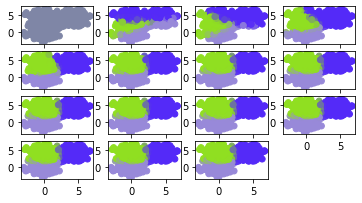

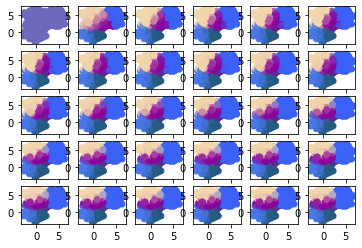

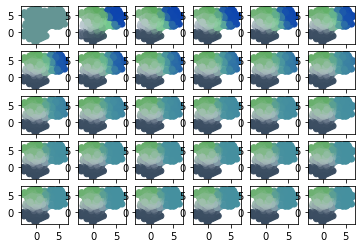

In [ ]:
def main():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3

    # what does it look like without clustering?
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3 # luckily, we already know this
    plot_k_means(X, K)

    K = 5 # what happens if we choose a "bad" K?
    plot_k_means(X, K, max_iter=30)

    K = 5 # what happens if we change beta?
    plot_k_means(X, K, max_iter=30, beta=0.3)


if __name__ == '__main__':
    main()

Condition where K-Mean can Fail

In [ ]:
#We are considering the donut and other datasets for consideration of failure state of k-Mean

def donut():
    N = 1000
    D = 2

    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    return X

Main function forinitiating the Program

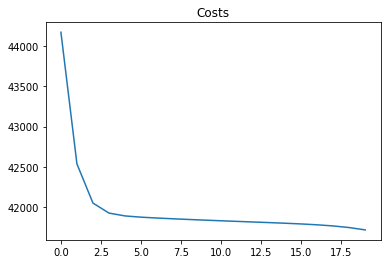

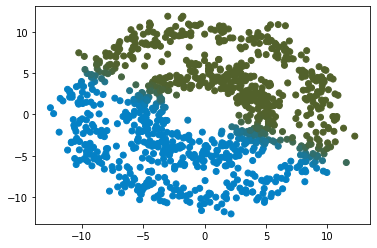

Final cost 41719.9341869581


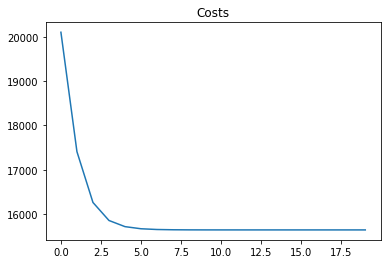

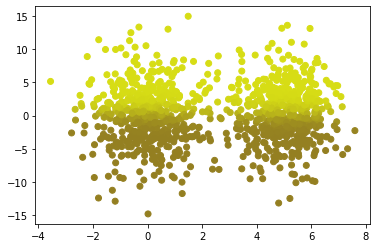

Final cost 15640.551183633272


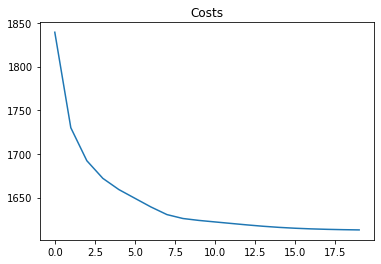

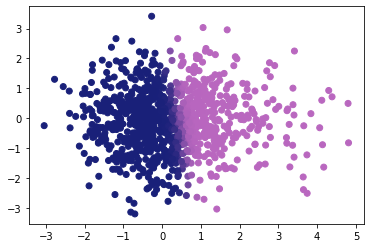

Final cost 1613.014481676606


In [ ]:
def main():
    # donut
    X = donut()
    plot_k_means(X, 2, beta=0.1, show_plots=True)

    # elongated clusters
    X = np.zeros((1000, 2))
    X[:500,:] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 20]], 500)
    X[500:,:] = np.random.multivariate_normal([5, 0], [[1, 0], [0, 20]], 500)
    plot_k_means(X, 2, beta=0.1, show_plots=True)

    # different density
    X = np.zeros((1000, 2))
    X[:950,:] = np.array([0,0]) + np.random.randn(950, 2)
    X[950:,:] = np.array([3,0]) + np.random.randn(50, 2)
    plot_k_means(X, 2, show_plots=True)



if __name__ == '__main__':
    main()

Now trying K-mean clustering for MNIST dataset

In [ ]:
from datetime import datetime

Importing MNIST data

In [ ]:
def get_data(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('/content/sample_data/mnist_train_small.csv')
    data = df.values
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

Functions for calculating purity of K-mean Clustering

In [ ]:
def purity2(Y, R):
    # maximum purity is 1, higher is better
    C = np.argmax(R, axis=1) # cluster assignments

    N = len(Y) # number of data pts
    K = len(set(Y)) # number of labels

    total = 0.0
    for k in range(K):
        max_intersection = 0
        for j in range(K):
            intersection = ((C == k) & (Y == j)).sum()
            if intersection > max_intersection:
                max_intersection = intersection
        total += max_intersection
    return total / N


def purity(Y, R):
    # maximum purity is 1, higher is better
    N, K = R.shape
    p = 0
    for k in range(K):
        best_target = -1 # we don't strictly need to store this
        max_intersection = 0
        for j in range(K):
            intersection = R[Y==j, k].sum()
            if intersection > max_intersection:
                max_intersection = intersection
                best_target = j
        p += max_intersection
    return p / N

In [ ]:
def DBI2(X, R):
    N, D = X.shape
    _, K = R.shape

    # get sigmas, means first
    sigma = np.zeros(K)
    M = np.zeros((K, D))
    assignments = np.argmax(R, axis=1)
    for k in range(K):
        Xk = X[assignments == k]
        M[k] = Xk.mean(axis=0)
        # assert(Xk.mean(axis=0).shape == (D,))
        n = len(Xk)
        diffs = Xk - M[k]
        sq_diffs = diffs * diffs
        sigma[k] = np.sqrt( sq_diffs.sum() / n )


    # calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K



def DBI(X, M, R):
    # ratio between sum of std deviations between 2 clusters / distance between cluster means
    # lower is better
    N, D = X.shape
    K, _ = M.shape

    # get sigmas first
    sigma = np.zeros(K)
    for k in range(K):
        diffs = X - M[k] # should be NxD
        squared_distances = (diffs * diffs).sum(axis=1) # now just N
        weighted_squared_distances = R[:,k]*squared_distances
        sigma[k] = np.sqrt( weighted_squared_distances.sum() / R[:,k].sum() )

    # calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K

Main function for running program

Reading in and transforming data...
Number of data points: 10000
Final cost 392192.442872663
Purity: 0.5926938962187842
Purity 2 (hard clusters): 0.5924
DBI: 2.8903422710438287
DBI 2 (hard clusters): 2.8884165001289195


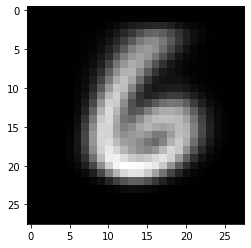

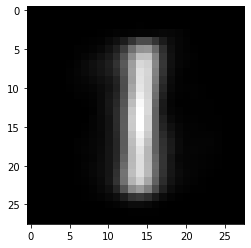

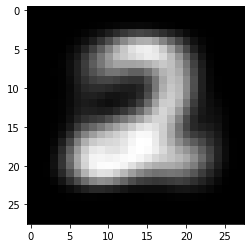

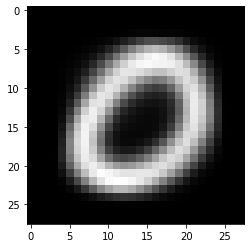

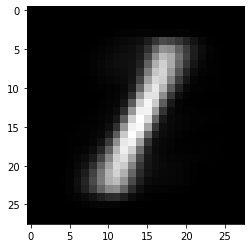

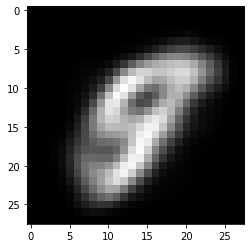

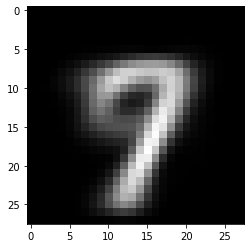

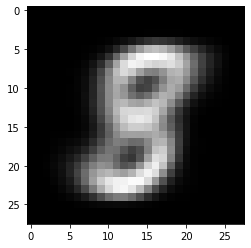

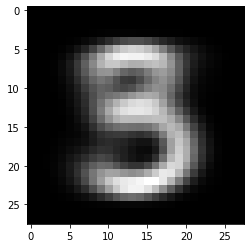

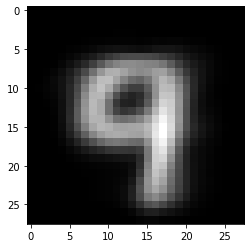

In [ ]:
import pandas as pd 

def main():
    # mnist data
    X, Y = get_data(10000)

    # simple data
    # X = get_simple_data()
    # Y = np.array([0]*300 + [1]*300 + [2]*300)

    print("Number of data points:", len(Y))
    M, R = plot_k_means(X, len(set(Y)))
    # Exercise: Try different values of K and compare the evaluation metrics
    print("Purity:", purity(Y, R))
    print("Purity 2 (hard clusters):", purity2(Y, R))
    print("DBI:", DBI(X, M, R))
    print("DBI 2 (hard clusters):", DBI2(X, R))

    # plot the mean images
    # they should look like digits
    for k in range(len(M)):
        im = M[k].reshape(28, 28)
        plt.imshow(im, cmap='gray')
        plt.show()


if __name__ == "__main__":
    main()

Code for eastimating  the best K. Choose suitable K which gives balance between overfitting and underfitting(sweet spot)

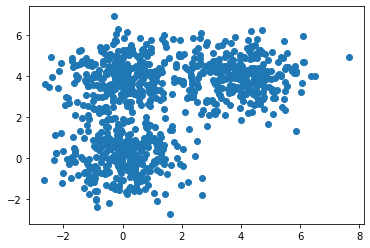

Final cost 7850.890514050688
Final cost 3806.0323459639976
Final cost 1647.8875616718112
Final cost 1439.0004220802057
Final cost 1231.140407583986
Final cost 1107.9596068595588
Final cost 1035.5058216381315
Final cost 946.3761518311067
Final cost 798.6413404062614


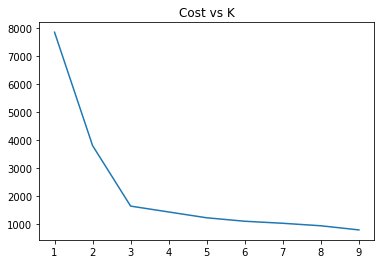

In [ ]:


def main():
  X = get_simple_data()

  plt.scatter(X[:,0], X[:,1])
  plt.show()

  costs = np.empty(10)
  costs[0] = None
  for k in range(1, 10):
    M, R = plot_k_means(X, k, show_plots=False)
    c = cost(X, R, M)
    costs[k] = c

  plt.plot(costs)
  plt.title("Cost vs K")
  plt.show()


if __name__ == '__main__':
  main()